# Tasks

In [16]:
# Importing Data frames.
import pandas as pd

# Machine Learning Library that contains example datasets.
import sklearn as skl

## Task 1: Source the Data Set

The Iris dataset is an example of multivariate data analysis. This dataset comprises 150 individual observations pertaining to three distinct species of Iris flowers: Setosa, Versicolor, and Virginica. Each observation encompasses four quantitative attributes: the lengths and widths of both sepals and petals.

I used a CSV version of the data from GitHub.

In [17]:
# Loading the iris dataset.
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')

📚 References:

- https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/materials/datasets.ipynb
- https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html#loading-the-iris-dataset


## Task 2: Explore the Data Structure

In [18]:
# Have a look.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


1. The dataset tells us how many rows and columns the dataset has.
2. The first 5 rows of the dataset: give us an idea of the structure and values in the dataset.
3. The last 5 rows of the dataset: help us confirm the consistency of the dataset.
4. The feature names: column names.
5. Target classes: these represent the categories of the species (Setosa, Virginica).

In [19]:
# Describing the dataset.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


`count`: All features have 150 values (no missing data).

`mean`: Average value for each feature.

`std`: Standard deviation (spread of values).

`min, max`: Minimum and maximum values for each feature.

`25%, 50%, 75%`: Quartiles — useful for understanding distribution shape and potential outliers.

📚 References: 

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe
- https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/materials/datasets.ipynb
- https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/materials/numpy.ipynb
- https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/materials/types.ipynb

## Task 3: Summarize the Data

In [20]:
# Computing summary statistics for numerical columns only (excluding 'species')
summary = df.describe().T  # T transposes for better readability, computes summary stats → https://shorturl.at/VRXqJ

# Computing median separately (excluding non-numeric columns)
# Because `describe()` doesn't include median it has to be done separately → https://shorturl.at/vvlUV
summary["median"] = df.select_dtypes(include=['number']).median()

# Selecting only relevant columns (what the task asked for) showing a summary → https://rebrand.ly/6f5ec4
summary = summary[["mean", "min", "max", "std", "median"]]

# Sorting rows alphabetically → https://shorturl.at/QG2rT
summary = summary.sort_index()

# Displaying the summary
summary

,mean,min,max,std,median
petal_length,3.758667,1.0,6.9,1.764420,4.35
petal_width,1.198667,0.1,2.5,0.763161,1.30
sepal_length,5.843333,4.3,7.9,0.828066,5.80
sepal_width,3.054000,2.0,4.4,0.433594,3.00


📚  References:

- https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.T.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
- https://www.w3schools.com/python/pandas/ref_df_describe.asp
- https://www.geeksforgeeks.org/indexing-and-selecting-data-with-pandas/
- https://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.describe.html
- https://stackoverflow.com/questions/64919984/how-to-use-describe-for-a-pandas-dataframe
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
- https://www.w3schools.com/python/pandas/ref_df_select_dtypes.asp
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_index.html

## Task 4: Visualize Features

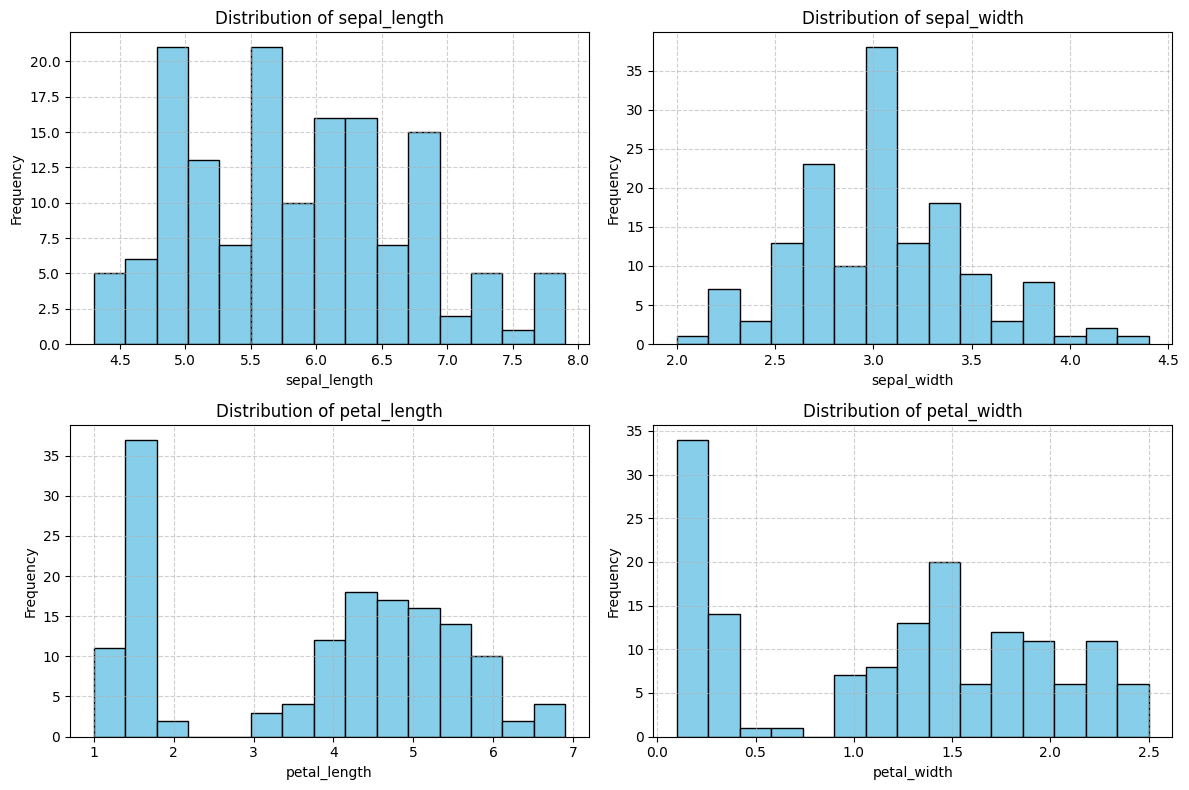

In [21]:
import matplotlib.pyplot as plt

# Defining numeric features only (excluding 'species')
features = df.select_dtypes(include='number').columns # selecting only numeric columns
# improvement from before because if the column order changes, the result stays the same → https://shorturl.at/E4Wje

# Setting figure size
plt.figure(figsize=(12, 8))

# Loop through features and plot histograms
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)  # Creates a 2x2 grid of subplots
    plt.hist(df[feature], bins=15, color='skyblue', edgecolor='black')  # Histogram
    plt.title(f"Distribution of {feature}")  # Title
    plt.xlabel(feature)  # X-axis label                              → https://shorturl.at/EHayI
    plt.ylabel("Frequency")  # Y-axis label
    plt.grid(True, linestyle='--', alpha=0.6) # creates grid lines → https://shorturl.at/aGZiR

# Adjusting layout for clarity
plt.tight_layout() # padding adjustment → https://shorturl.at/RUDMb
plt.show()


📚 References:

- https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/materials/matplotlib.ipynb
- https://medium.com/@rudraprasadbhuyan999/matplotlib-all-graphs-70bb2c427cde
- https://www.w3schools.com/Python/matplotlib_subplot.asp
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
- https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
- https://realpython.com/pandas-plot-python/
- https://matplotlib.org/stable/plot_types/index.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html
- https://stackoverflow.com/questions/64063367/grid-and-limit-issues-with-matplotlib
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html

## Task 5: Investigate Relationships

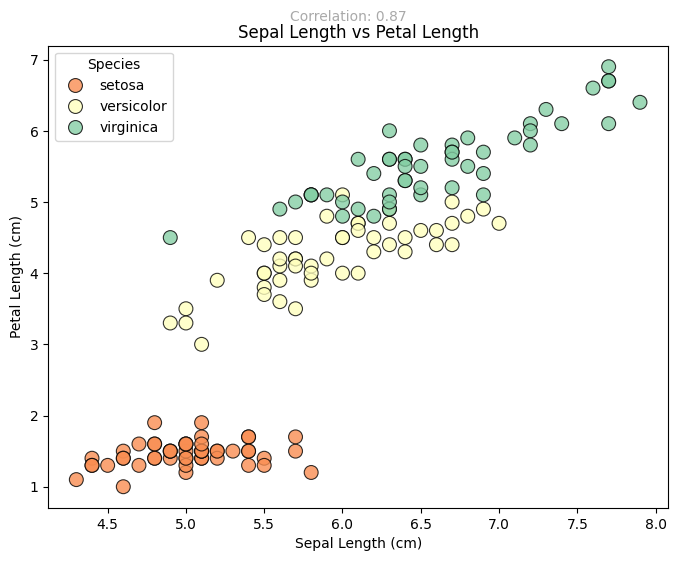

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choosing two features for the scatter plot
x_feature = "sepal_length"
y_feature = "petal_length"

# Creating the scatter plot, including colour pallets, marker sizes, outlines and transparency
plt.figure(figsize=(8, 6)) #specified size
sns.scatterplot(
    x=df[x_feature],
    y=df[y_feature],
    hue=df["species"],           # Colour-coding species
    palette="Spectral",          # Colourful palette
    s=100,
    edgecolor="black",
    alpha=0.8
)

# Adding labels and title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Sepal Length vs Petal Length")

# Adding correlation
corr = df[[x_feature, y_feature]].corr().iloc[0, 1]

# Displaying the correlation coefficient as a small subtitle
plt.suptitle(f"Correlation: {corr:.2f}", fontsize=10, y=0.94, color='darkgray')

# Showing the legend - adds a legend that shows which color corresponds to which species.
plt.legend(title="Species")

# Displaying the plot
plt.show()


📚 References:

- https://seaborn.pydata.org/
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot
- https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/materials/scatterplots.ipynb
- https://medium.com/data-science-collective/the-perfect-plotting-guide-for-data-science-practitioners-7d22f7ba3f85
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
- https://stackoverflow.com/questions/68508131/graphically-show-correlation-between-columns-of-a-pandas-dataframe
- https://seaborn.pydata.org/tutorial/aesthetics.html
- https://seaborn.pydata.org/generated/seaborn.set_style.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/gallery/color/colormap_reference.html


## Task 6: Analyze Relationship

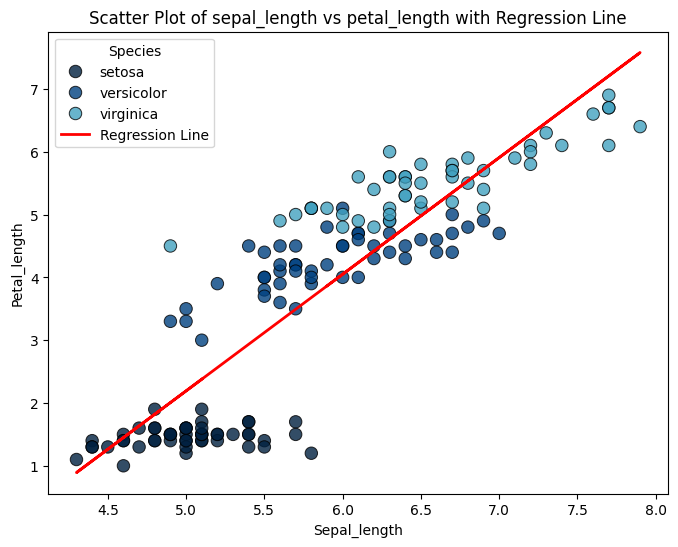

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Choosing two features for scatter plot
x_feature = "sepal_length"
y_feature = "petal_length"

# Extracting numerical data
x = df[x_feature]
y = df[y_feature]

# Fitting a linear regression line (degree=1 for a straight line)
slope, intercept = np.polyfit(x, y, 1)

# Creating scatter plot with species color-coded
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x, y=y, hue=df["species"], palette="ocean", s=80, edgecolor="black", alpha=0.8)

# Plotting regression line
plt.plot(x, slope * x + intercept, color="red", linewidth=2, label="Regression Line")

# Adding labels and title
plt.xlabel(x_feature.capitalize())
plt.ylabel(y_feature.capitalize())
plt.title(f"Scatter Plot of {x_feature} vs {y_feature} with Regression Line")

# Showing legend
plt.legend(title="Species")

# Displaying the plot
plt.show()


📚 References:

- https://numpy.org/doc/2.0/reference/generated/numpy.polyfit.html
- https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/materials/line_fitting.ipynb
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://www.w3schools.com/python/matplotlib_plotting.asp
- https://www.w3schools.com/python/matplotlib_labels.asp


## Task 7: Analyze Class Distribution

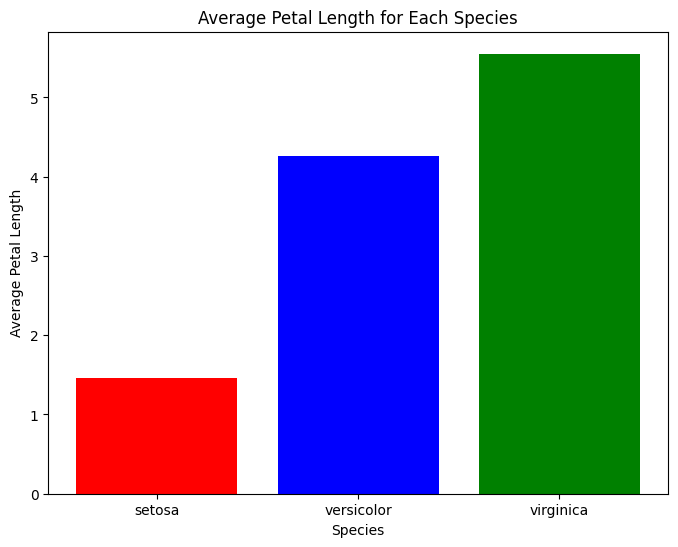

In [24]:
import matplotlib.pyplot as plt

# Calculating mean petal length for each species
species = df["species"].unique()
mean_petal_lengths = df.groupby("species")["petal_length"].mean()

# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(species, mean_petal_lengths, color=["red", "blue", "green"])

# Adding labels and title
plt.xlabel("Species")
plt.ylabel("Average Petal Length")
plt.title("Average Petal Length for Each Species")

# Displaying the plot
plt.show()


📚 References:

- https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.core.groupby.GroupBy.mean.html
- https://www.w3schools.com/python/matplotlib_plotting.asp
- https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
- https://www.w3schools.com/python/matplotlib_labels.asp

## Task 8: Compute Correlations

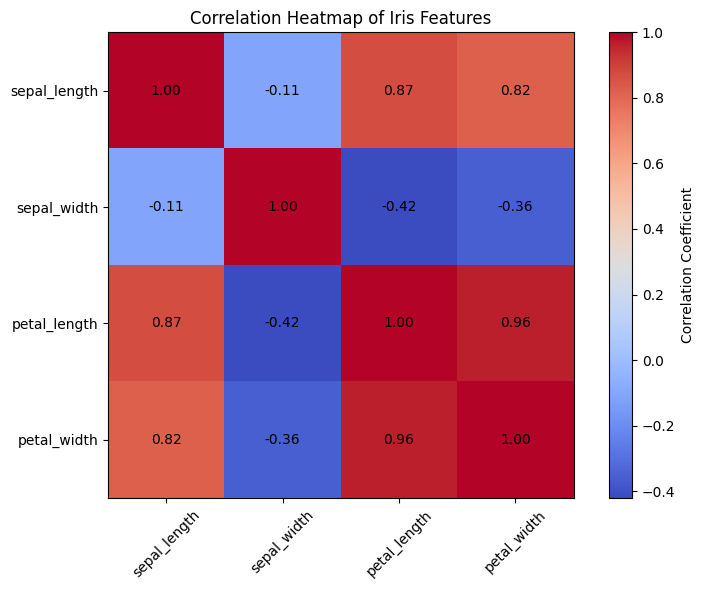

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Computing the correlation matrix (numeric features only)
correlation_matrix = df.select_dtypes(include='number').corr()

# Plotting the heatmap using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')

# Setting ticks and labels
tick_marks = np.arange(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=45)
plt.yticks(tick_marks, correlation_matrix.columns)

# Adding text annotations (correlation values)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# Title and layout
plt.title("Correlation Heatmap of Iris Features")
plt.tight_layout()
plt.show()


📚 References:

- https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- https://www.w3schools.com/python/pandas/ref_df_select_dtypes.asp
- https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
- https://matplotlib.org/stable/users/explain/colors/colormaps.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
- https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html
- https://matplotlib.org/stable/gallery/user_interfaces/svg_histogram_sgskip.html#sphx-glr-gallery-user-interfaces-svg-histogram-sgskip-py
- https://www.w3schools.com/python/matplotlib_labels.asp
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html


## Task 9: Simple Linear Regression

R² (Scikit-Learn Calculation): 0.7599553107783261


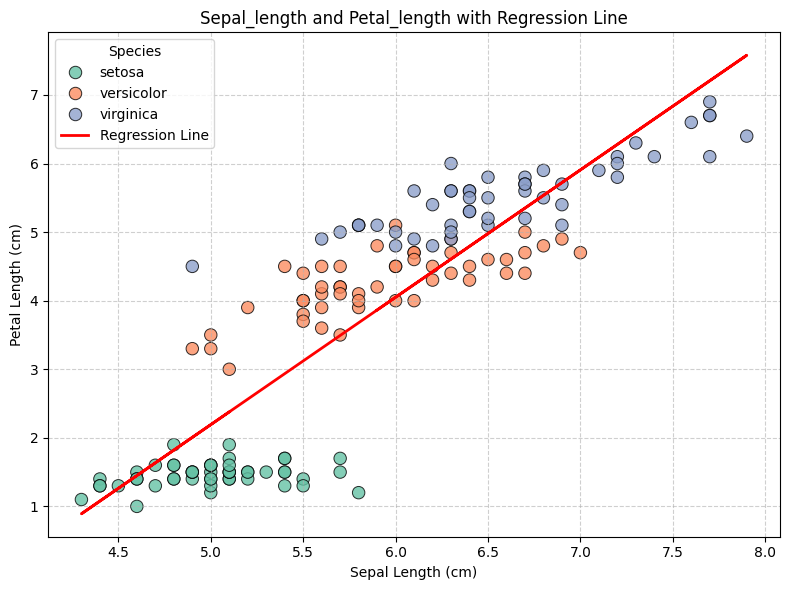

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression  # For regression model
from sklearn.metrics import r2_score              # For R² calculation
import pandas as pd
import numpy as np

# Step 1: Defining the features (from Task 5) - these data frame columns will be used for the regression
x_feature = "sepal_length"
y_feature = "petal_length"

# Step 2: Preparing the input data
X = df[[x_feature]]  # Independent variable (2D array), x must be a 2D array for Scikit-learn → https://rebrand.ly/37356d
y = df[y_feature]    # Dependent variable (1D array of target values) → https://shorturl.at/hmnnX

# Step 3: Fitting the regression model → https://shorturl.at/dF8Vo
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict using the model → https://shorturl.at/dF8Vo
y_pred = model.predict(X) # predicts petal_length based on sepal_length using the fitted model

# Step 5: Calculating R² score → https://shorturl.at/cN3rc
r2 = r2_score(y, y_pred) # measures how well the model explains the data

# Step 6: Creating scatter plot + regression line
plt.figure(figsize=(8, 6)) # enhancing readability → https://shorturl.at/qwJAz
sns.scatterplot(x=df[x_feature], y=df[y_feature], hue=df["species"], palette="Set2", 
                s=80, edgecolor="black", alpha=0.8, legend=True) # scatter plot with species colouring → https://shorturl.at/kauEp

# Adding red regression line
plt.plot(df[x_feature], y_pred, color="red", linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Sepal Length (cm)") # improving readability for labels
plt.ylabel("Petal Length (cm)")
plt.title(f"{x_feature.capitalize()} and {y_feature.capitalize()} with Regression Line") # string charecter is capitalised

# Adding R² annotation
print(f"R² (Scikit-Learn Calculation): {r2}") # Calculating R2 with Scikit-Learn for Sample Data → https://shorturl.at/TFYpw

# Adding legend → https://shorturl.at/cBULl
plt.legend(title="Species")

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.6) # adds grid lines to the plot and formats them 
plt.tight_layout() # Adjust the padding between and around subplots
plt.show()


📚 References:
- https://realpython.com/linear-regression-in-python/
- https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
- https://scikit-learn.org/0.15/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/0.17/modules/generated/sklearn.metrics.r2_score.html
- https://scikit-learn.org/0.17/auto_examples/linear_model/plot_lasso_and_elasticnet.html#example-linear-model-plot-lasso-and-elasticnet-py
- https://www.geeksforgeeks.org/sklearn-diabetes-dataset/
- https://www.geeksforgeeks.org/how-to-calculate-r2-with-scikit-learn/
- https://stackoverflow.com/questions/61367841/why-does-the-fit-method-in-sklearns-linearregression-only-accept-2d-array-for-t
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
- https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
- https://www.w3schools.com/python/matplotlib_plotting.asp
- https://www.geeksforgeeks.org/matplotlib-pyplot-title-in-python/
- https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
- https://www.geeksforgeeks.org/how-to-change-the-size-of-figures-drawn-with-matplotlib/
- https://www.w3schools.com/python/matplotlib_labels.asp
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.grid.html
- https://www.w3schools.com/python/matplotlib_grid.asp
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html

